In [2]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay


In [4]:
df = pd.read_csv('feature_set.csv')

In [111]:
X = df.loc[:, df.columns!='Label']
y_raw = np.array(pd.Series(df['Label']))

In [105]:
test_df = pd.read_csv('test_feature_set.csv')
Xtest = test_df.loc[:, test_df.columns!='Label'].to_numpy()
ytest_raw = np.array(pd.Series(test_df['Label']))

In [80]:
ytest = [n-1 for n in ytest_raw]

# Preprocess the data with scalers

In [112]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = [n-1 for n in y_raw]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [115]:
Xtest = scaler.transform(Xtest)

/home/alexiswu/2023Fall/NeuroTech/neurotech/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN
## Train

accuracy is: 0.9 
 f1 score is: [0.90566038 0.9375     0.85714286]


Text(0.5, 1.0, 'KNN classifier Result')

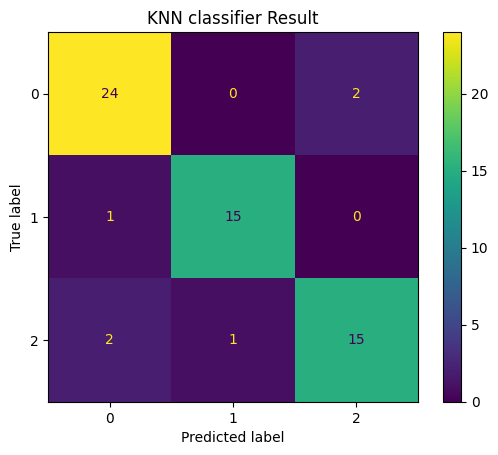

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("KNN classifier Result")

## Test

accuracy is: 0.9166666666666666 
 f1 score is: [0.91139241 0.95       0.88888889]


Text(0.5, 1.0, 'KNN classifier Test Result')

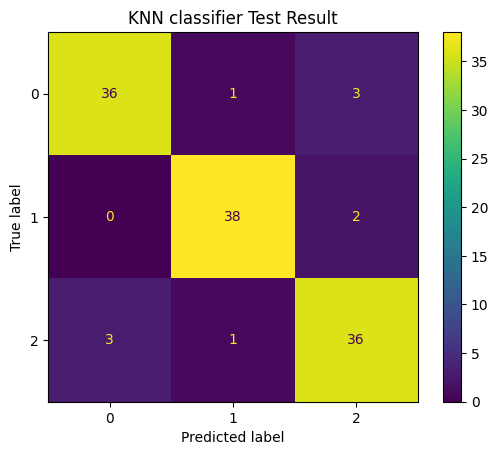

In [118]:
test_pred = knn.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title("KNN classifier Test Result")

# SVM


## Train


accuracy is: 0.9666666666666667 
 f1 score is: [0.96153846 1.         0.94444444]


Text(0.5, 1.0, 'SVM classifier Result')

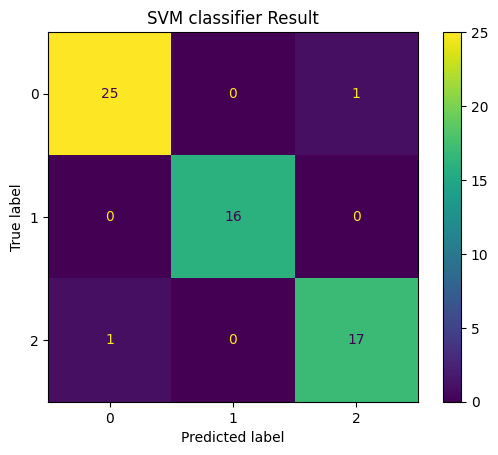

In [120]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.title("SVM classifier Result")

## Test

accuracy is: 0.9583333333333334 
 f1 score is: [0.95121951 0.98734177 0.93670886]


Text(0.5, 1.0, 'SVM classifier Test Result')

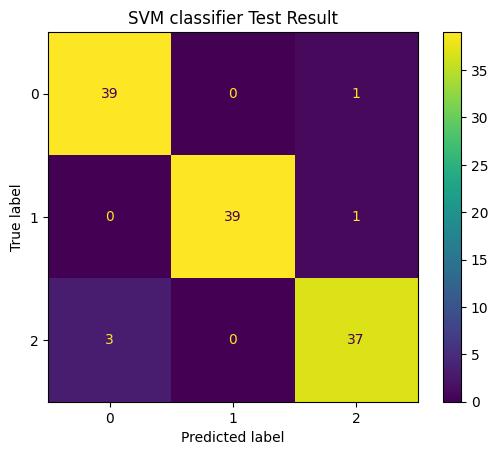

In [121]:
test_pred = svm.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.title("SVM classifier Test Result")